In [62]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report , ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

#alot of imports can make the program run slow but imported just in case to run the program smoothly

In [63]:
# Load the furniture.csv file into a pandas DataFrame named df
df = pd.read_csv('/content/mto_mts.csv')

In [64]:
# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Print the data types of each column
print('\nData types of each column:')
print(df.dtypes)

# Display a concise summary of the DataFrame
print('\nSummary of the DataFrame:')
df.info()

#statistics
df.describe()

First 5 rows of the DataFrame:
   Item  demand  order cost  holding cost  c1 (MTS) c2 (MTO)    Cost MTS  \
0     1     505         711           2.0        10  10.14 €  6,248.42 €   
1     2     519         779           1.4         7   7.92 €  4,696.97 €   
2     3      74         819           1.0         5   8.17 €    718.16 €   
3     4     471         423           1.0         5   8.19 €  2,986.24 €   
4     5     781         912           0.2         1   1.49 €  1,314.77 €   

     Cost MTO  MTS  MTO  
0  5,120.94 €    0    1  
1  4,109.99 €    0    1  
2    604.57 €    0    1  
3  3,855.55 €    1    0  
4  1,161.88 €    0    1  

Data types of each column:
Item              int64
demand            int64
order cost        int64
holding cost    float64
c1 (MTS)          int64
c2 (MTO)         object
Cost MTS         object
Cost MTO         object
MTS               int64
MTO               int64
dtype: object

Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeInde

,Item,demand,order cost,holding cost,c1 (MTS),MTS,MTO
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,508.95000,553.103333,1.076000,5.380000,0.590000,0.410000
std,86.746758,295.70234,256.490358,0.562683,2.813417,0.492655,0.492655
min,1.000000,10.00000,102.000000,0.200000,1.000000,0.000000,0.000000
25%,75.750000,252.50000,319.500000,0.600000,3.000000,0.000000,0.000000
50%,150.500000,520.00000,563.500000,1.000000,5.000000,1.000000,0.000000
75%,225.250000,776.00000,765.500000,1.600000,8.000000,1.000000,1.000000
max,300.000000,998.00000,999.000000,2.000000,10.000000,1.000000,1.000000


In [65]:
#as 'c2', 'cost mts' and 'cost mto' are object because of '€' sign present we have to change it
# to int by removing the euro symbol

def clean_currency(x):
    """Helper function to remove currency symbols and convert to float."""
    if isinstance(x, str):
        return float(x.replace('€', '').replace(',', ''))
    return x

cols_to_clean = ['c2 (MTO)', 'Cost MTS', 'Cost MTO']

#Note: 'c1 (MTS)' loads as int, but we check if it needs cleaning just in case.

if df['c1 (MTS)'].dtype == 'O':
    cols_to_clean.append('c1 (MTS)')

for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(clean_currency)



In [66]:
#removing 'Item' and total variable costs
feature_cols = ['demand', 'order cost', 'holding cost', 'c1 (MTS)', 'c2 (MTO)']
target_col = 'MTS'  # 1 for Make-to-Stock, 0 for Make-to-Order

X = df[feature_cols]
y = df[target_col]

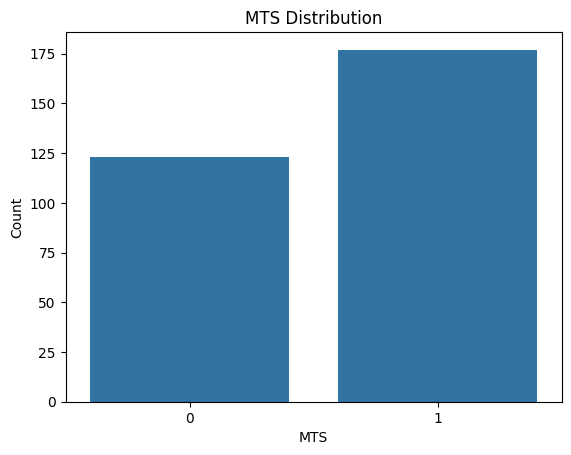

In [67]:
# Visualize the MTS distribution
sns.countplot(x='MTS', data=df)
plt.title("MTS Distribution")
plt.xlabel("MTS")
plt.ylabel("Count")
plt.show()

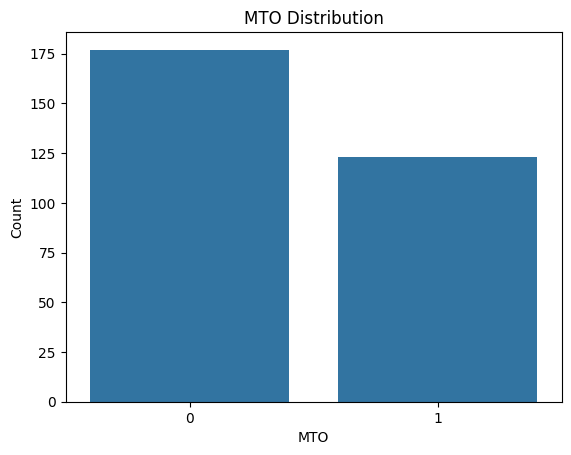

In [68]:
# Visualize the MTO distribution
sns.countplot(x='MTO', data=df)
plt.title("MTO Distribution")
plt.xlabel("MTO")
plt.ylabel("Count")
plt.show()

We do not need to scale for Decision Tree Classifier because it is not sensitive to the magnitude or scale of the features.

In [69]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


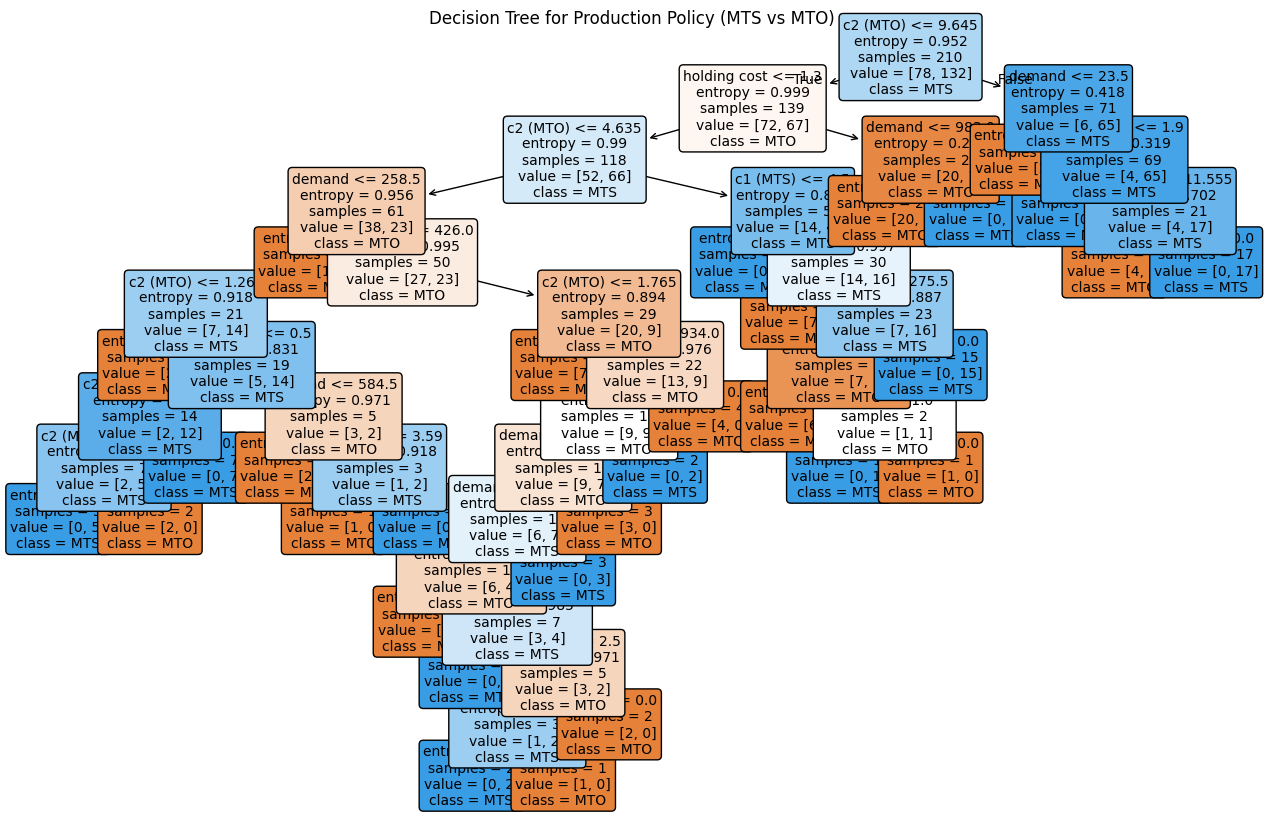

In [70]:
# Fit Decision Tree Classifier

# Using 'entropy' to calculate Information Gain.
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
#we have no max tree depth because it produced results with better better accuracy

# Visualizing the Tree
plt.figure(figsize=(16, 10))
plot_tree(clf,
          feature_names=feature_cols,
          class_names=['MTO', 'MTS'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Production Policy (MTS vs MTO)")
plt.show()

In [71]:
# 7. Analyzing Information Gain from the Root Node

root_feature_index = clf.tree_.feature[0]
root_feature_name = feature_cols[root_feature_index]
root_threshold = clf.tree_.threshold[0]

print("-" * 30)
print("-" * 30)
print(f"Root Node (Highest Information Gain):")
print(f"Feature: {root_feature_name}")
print(f"Threshold: <= {root_threshold:.4f}")
print("-" * 30)
print("-" * 30)

------------------------------
------------------------------
Root Node (Highest Information Gain):
Feature: c2 (MTO)
Threshold: <= 9.6450
------------------------------
------------------------------


In [72]:
# 8. Evaluation
# f1 score and accuracy as two additional performance matrix
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics (on Test Set):")
print(f"Accuracy: {accuracy:.2%}")
print(f"F1 Score (MTS class): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nFull Classification Report:")
print(classification_report(y_test, y_pred, target_names=['MTO', 'MTS']))

Evaluation Metrics (on Test Set):
Accuracy: 81.11%
F1 Score (MTS class): 0.8247

Confusion Matrix:
[[33 12]
 [ 5 40]]

Full Classification Report:
              precision    recall  f1-score   support

         MTO       0.87      0.73      0.80        45
         MTS       0.77      0.89      0.82        45

    accuracy                           0.81        90
   macro avg       0.82      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



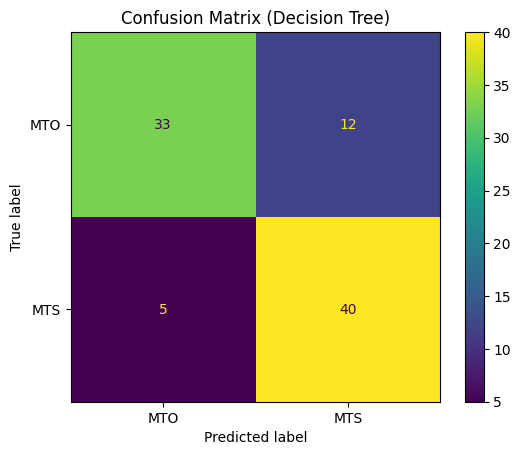

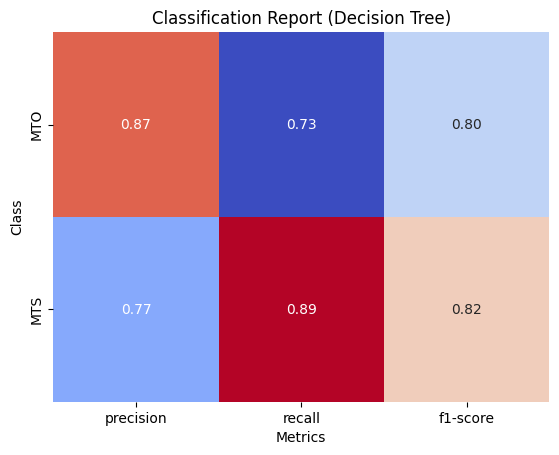

In [73]:
# Ploting Confusion Matrix for decision tree
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['MTO', 'MTS'])
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

# Ploting Classification Report for decision tree with correct labeling
report = classification_report(y_test, y_pred, output_dict=True, target_names=['MTO', 'MTS'])
report_df = pd.DataFrame(report).transpose()

# Selecting only the 'MTO' and 'MTS' rows and the primary metrics for the heatmap
metrics_to_plot = report_df.loc[['MTO', 'MTS'], ['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_to_plot, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title("Classification Report (Decision Tree)")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

When the model predicts MTO, it is correct 87% of the time which is excellent. It correctly identifies 73% of all true MTO cases considered good, but still the weaker point and when the model predicts MTS, it is correct 77% of the time. It successfully identifies 89% of all actual MTS products considered Excellent.

*Reference: Used Google Gemini and Notebook for coding supervision